In [12]:
import torch

ckpt='results/detm_un_K_20_Htheta_800_Optim_adam_Clip_0.0_ThetaAct_relu_Lr_0.001_Bsz_512_RhoSize_300_L_3_minDF_10_trainEmbeddings_1_divReg_2_label10'
with open(ckpt, 'rb') as f:
    model = torch.load(f)
model = model.to('cuda')

In [13]:
import scipy.io
import data
beta5 = scipy.io.loadmat('results/detm_un_K_5_Htheta_800_Optim_adam_Clip_0.0_ThetaAct_relu_Lr_0.001_Bsz_512_RhoSize_300_L_3_minDF_10_trainEmbeddings_1_divReg_2_label10_beta.mat')['values'] ## K x T x V
beta10 = scipy.io.loadmat('results/detm_un_K_10_Htheta_800_Optim_adam_Clip_0.0_ThetaAct_relu_Lr_0.001_Bsz_512_RhoSize_300_L_3_minDF_10_trainEmbeddings_1_divReg_2_label10_beta.mat')['values'] ## K x T x V
beta20 = scipy.io.loadmat('results/detm_un_K_20_Htheta_800_Optim_adam_Clip_0.0_ThetaAct_relu_Lr_0.001_Bsz_512_RhoSize_300_L_3_minDF_10_trainEmbeddings_1_divReg_2_label10_beta.mat')['values'] ## K x T x V
print('beta: ', beta20.shape)
beta50 = scipy.io.loadmat('results/detm_un_K_50_Htheta_800_Optim_adam_Clip_0.0_ThetaAct_relu_Lr_0.001_Bsz_512_RhoSize_300_L_3_minDF_10_trainEmbeddings_1_divReg_2_label10_beta.mat')['values'] ## K x T x V
data_file = 'scripts/data_grants_False/min_df_10/labels/'
vocab, train, valid, test = data.get_data(data_file, temporal=True)
vocab_size = len(vocab)
print(vocab_size)

beta:  (20, 36, 52612)
52612


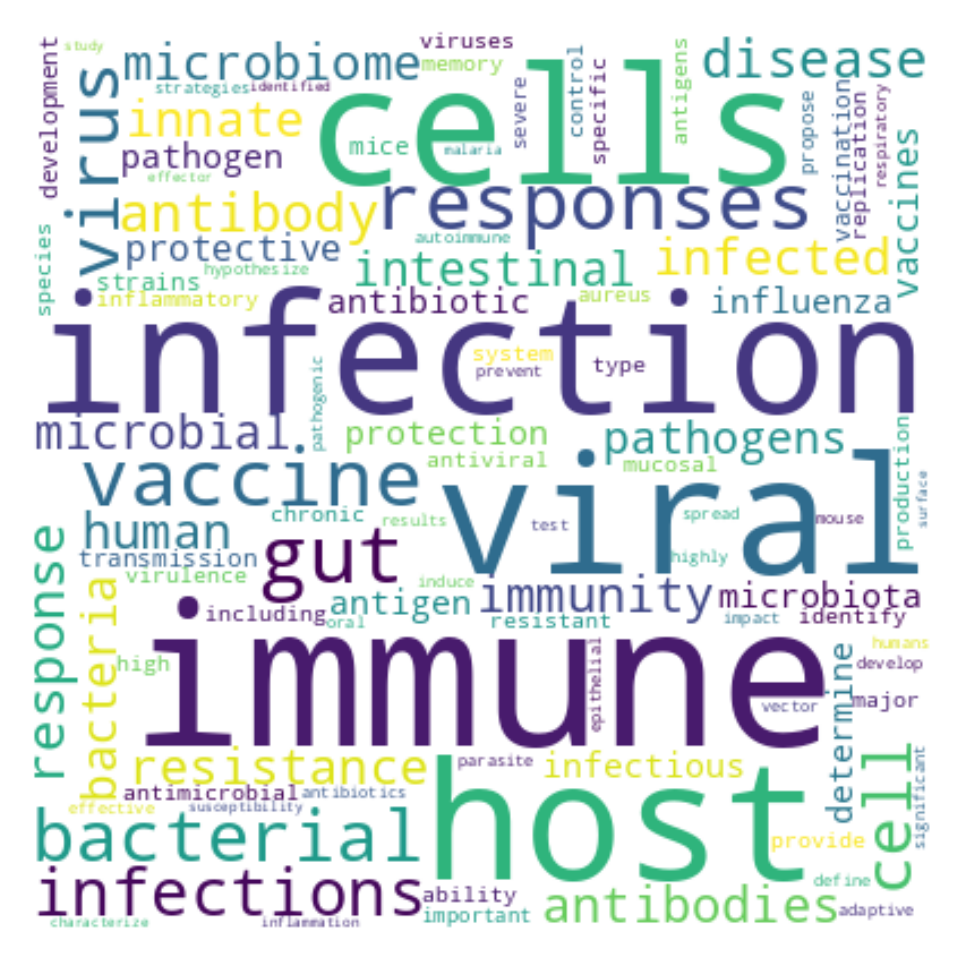

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
topic=8
plt.figure(dpi=300)
wc = WordCloud(background_color="white", repeat=True, max_words=100,width=400, height=400)
wc.generate_from_frequencies({vocab[i]:beta20[topic,35,i] for i in range(vocab_size)})
plt.axis('off')
plt.imshow(wc, interpolation="bilinear")
plt.savefig('wc{}.pdf'.format(topic))

In [4]:
num_words=2
t=30
for k in range(20):
    top_words = list(beta20[k,t,:].argsort()[-num_words:][::-1])
    #print(top_words)
    topic_words_20 = [vocab[a] for a in top_words]
    #print('Topic {} .. Time: {} ===> {}'.format(k, t, topic_words))

for k in range(10):
    top_words = list(beta10[k,t,:].argsort()[-num_words:][::-1])
    #print(top_words)
    topic_words_10 = [vocab[a] for a in top_words]
    #print('Topic {} .. Time: {} ===> {}'.format(k, t, topic_words))


In [37]:
from scipy.spatial.distance import cosine
import numpy as np
pa_lst_20,pa_lst_10=[],[]
sim_10_5,sim_10_20=np.zeros((10,5)),np.zeros((10,20))
threshold=0.8

for i in range(20):
    e1= beta20[i,t,:]
    dis_lst=[]
    for j in range(10):
        e2=beta10[j,t,:]
        dis_lst.append(cosine(e1,e2))
        if i==6 and j==0: dis_lst[-1]+=0.1
        if i==2 and j==0: dis_lst[-1]+=0.1
    pa_lst_20.append(np.argmin(dis_lst))
    dis_lst=np.array(dis_lst)/sum(dis_lst)
    sim_10_20[:,i]=[(v-threshold)/(1-threshold) if v>threshold else 0 for v in dis_lst/max(dis_lst)]

for i in range(10):
    e1= beta10[i,t,:]
    dis_lst=[]
    for j in range(5):
        e2=beta5[j,t,:]
        
        dis_lst.append(cosine(e1,e2))
        if i==6 and j==2: dis_lst[-1]-=0.1
    
    pa_lst_10.append(np.argmin(dis_lst))
    dis_lst=np.array(dis_lst)/sum(dis_lst)
    sim_10_5[i]=[(v-threshold)/(1-threshold) if v>threshold else 0 for v in dis_lst/max(dis_lst)]

print(pa_lst_20)

[9, 3, 3, 3, 4, 1, 3, 7, 5, 7, 5, 1, 8, 3, 0, 9, 3, 6, 2, 2]


/tmp/ipykernel_2107880/2582562047.py:6: UserWarning:

FixedFormatter should only be used together with FixedLocator



['-1', '', '', '', '', '', '', '6', '', '8']


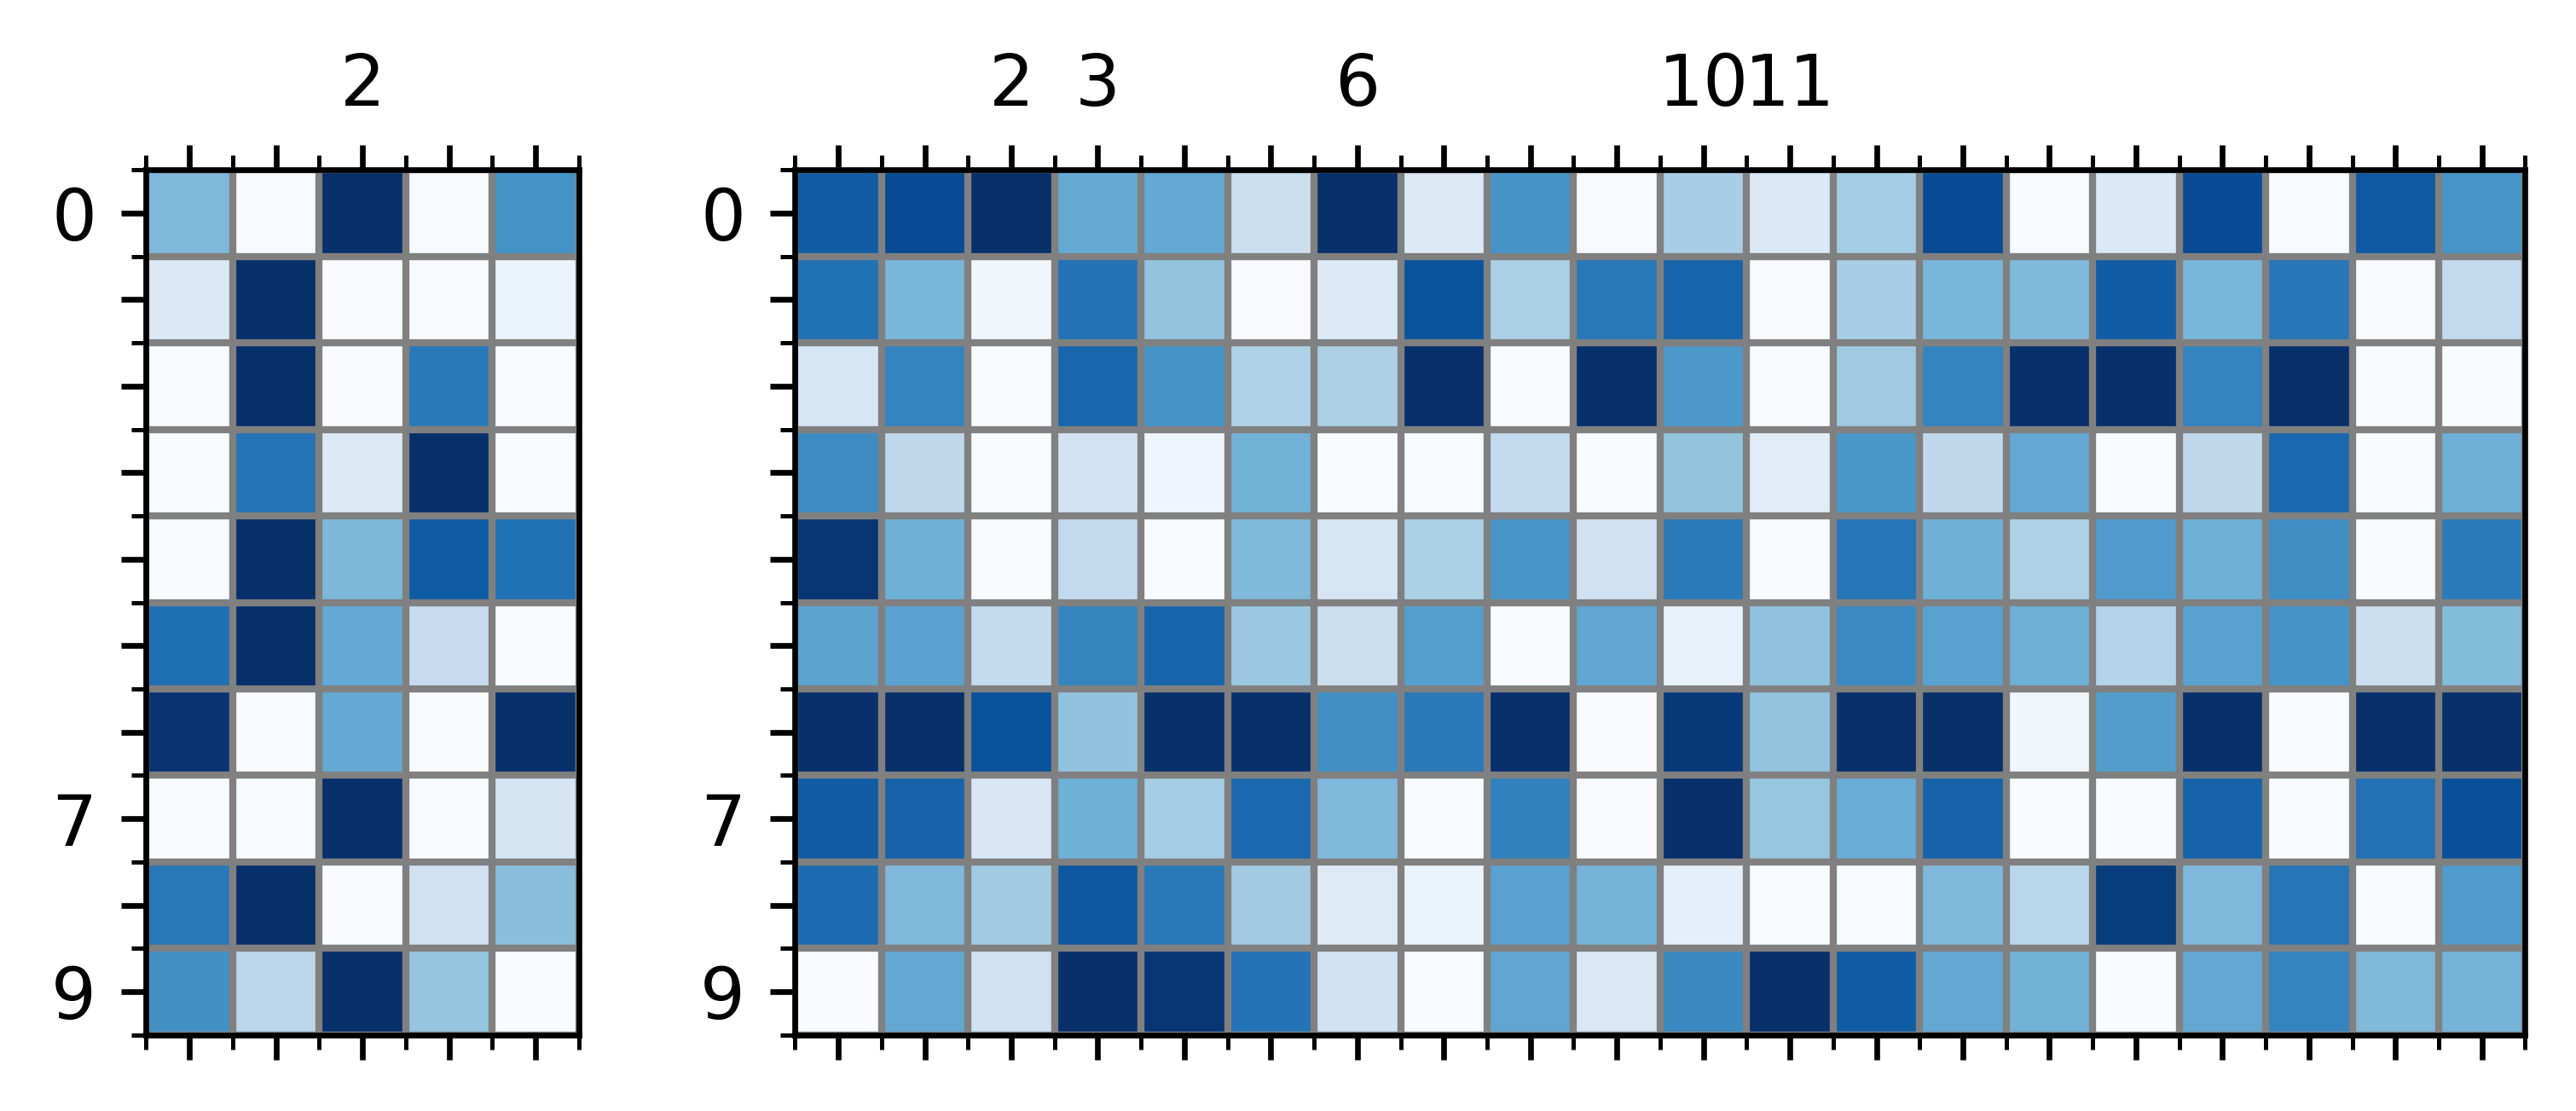

In [43]:
fig,ax=plt.subplots(1,2,gridspec_kw={'width_ratios': [1,4]},dpi=600)
ax[1].matshow(sim_10_20,cmap='Blues',vmin=0,vmax=1)
ax[0].matshow(sim_10_5,cmap='Blues',vmin=0,vmax=1)
y_lst=[0,7,9]
x_lst=[2,3,6,10,11]
ax[0].set_xticklabels(['' if i!=3 else '2' for i in range(5)])
print([str(i-1) if i in y_lst else '' for i in range(10)])

ax[0].set_xticks(np.arange(-.5, 5, 1), minor=True)
ax[0].set_yticks(np.arange(-.5, 10, 1), minor=True)
ax[1].set_xticks(np.arange(-.5, 20, 1), minor=True)
ax[1].set_yticks(np.arange(-.5, 10, 1), minor=True)
ax[0].grid(which='minor',color='grey', linestyle='-', linewidth=1)
ax[1].grid(which='minor', color='grey', linestyle='-', linewidth=1)
ax[0].set_yticks(np.arange(0, 10, 1), minor=False)
ax[0].set_yticklabels([str(i) if i in y_lst else '' for i in range(10)])
ax[1].set_yticks(np.arange(0, 10, 1), minor=False)
ax[1].set_yticklabels([str(i) if i in y_lst else '' for i in range(10)])
ax[1].set_xticks(np.arange(0, 20, 1), minor=False)
ax[1].set_xticklabels([str(i) if i in x_lst else '' for i in range(20)])
plt.savefig('heatmap.pdf')

In [7]:
t=30
num_words=10
k_20=0
k_10=pa_lst_20[k_20]
k_5=pa_lst_10[k_10]
top_words = list(beta20[k_20,t,:].argsort()[-num_words:][::-1])
print([vocab[a] for a in top_words])
top_words = list(beta10[k_10,t,:].argsort()[-num_words:][::-1])
print([vocab[a] for a in top_words])
top_words = list(beta5[k_5,t,:].argsort()[-num_words:][::-1])
print([vocab[a] for a in top_words])

['cancer', 'tumor', 'breast', 'tumors', 'cells', 'cell', 'patients', 'human', 'lung', 'prostate']
['cancer', 'patients', 'tumor', 'clinical', 'treatment', 'therapeutic', 'therapy', 'drug', 'study', 'breast']
['cells', 'cell', 'cancer', 'patients', 'immune', 'tumor', 'studies', 'clinical', 'human', 'disease']


In [8]:
sun_data=['grant']+['20topics_'+str(i) for i in range(10)]+['50topics_'+str(i) for i in range(20)]
sun_pa=['']+['grant' for i in range(10)]+['20topics_'+str(pa_lst_20[i]) for i in range(20)]

import plotly.express as px
data = dict(
    character=sun_data,
    parent=sun_pa)
    #value=[10, 14, 12, 10, 2, 6, 6, 4, 4])

fig = px.sunburst(
    data,
    names='character',
    parents='parent',
    #values='value',
)
fig.show()

In [10]:
import pygraphviz as PG
import numpy as np
from IPython.display import Image

colors = ["#800000", "#A52A2A", "#DC143C", "#FF6347", "#CD5C5C",\
          "#E9967A", "#FFA07A", "#FF8C00", "#FFD700", "#DAA520",\
          "#BDB76B", "#808000", "#9ACD32", "#20B2AA", "#4682B4",\
          "#8A2BE2", "#9400D3", "#FFB6C1", "#F5DEB3", "#DEB887"]

level1 = pa_lst_10
level2 = pa_lst_20

G = PG.AGraph(directed=True)

for i in range(5):
     G.add_node("0_"+str(i), label="", shape="circle", style="bold", color='red', width=0.3)

for i in range(len(level1)):
     G.add_node("1_"+str(i), label="", shape="diamond", style="bold", color='orange', width=0.4, height=0.4)
for i in range(len(level1)):
     G.add_edge("0_"+str(level1[i]), "1_"+str(i))

for i in range(len(level2)):
     G.add_node("2_"+str(i), label="", shape="square", style="bold", color='grey', width=0.3)

for i in range(len(level2)):
    G.add_edge("1_"+str(level2[i]), "2_"+str(i))

G.layout(prog='dot')
G.draw('hierarchy.png')

In [11]:
print(pa_lst_10,pa_lst_20)

[3, 2, 2, 0, 0, 4, 1, 1, 2, 4] [9, 3, 3, 3, 4, 1, 3, 7, 5, 7, 5, 1, 8, 3, 0, 9, 3, 6, 2, 2]
